#  TRAFFIC SIGN DETECTION USING CONVOLUTIONAL NEURAL NETWORK

- Developed a Deep Convolutional Neural Network Model that classifies the images of traffic signs. 
- Trained the model using the German Traffic Sign Dataset.
- Implemented the Convolutional Neural Network Model based on **LeNet Architecture**.
- The model will classify the images of traffic signs into 43 different classes.
- Classes are as listed below: 

    - 0 - Speed limit (20km/h)
    - 1 - Speed limit (30km/h)
    - 2 - Speed limit (50km/h) 
    - 3 - Speed limit (60km/h)
    - 4 - Speed limit (70km/h)
    - 5 - Speed limit (80km/h)
    - 6 - End of speed limit (80km/h) 
    - 7 - Speed limit (100km/h)
    - 8 - Speed limit (120km/h) 
    - 9 - No passing
    - 10 - No passing for vehicles over 3.5 metric tons
    - 11 - Right-of-way at the next intersection
    - 12 - Priority road
    - 13 - Yield 
    - 14 - Stop
    - 15 - No vehicles
    - 16 - Vehicles over 3.5 metric tons prohibited 
    - 17 - No entry
    - 18 - General caution 
    - 19 - Dangerous curve to the left
    - 20 - Dangerous curve to the right 
    - 21 - Double curve
    - 22 - Bumpy road
    - 23 - Slippery road
    - 24 - Road narrows on the right 
    - 25 - Road work
    - 26 - Traffic signals 
    - 27 - Pedestrians 
    - 28 - Children crossing
    - 29 - Bicycles crossing
    - 30 - Beware of ice/snow
    - 31 - Wild animals crossing
    - 32 - End of all speed and passing limits
    - 33 - Turn right ahead
    - 34 - Turn left ahead 
    - 35 - Ahead only 
    - 36 - Go straight or right
    - 37 - Go straight or left
    - 38 - Keep right 
    - 39 - Keep left
    - 40 - Roundabout mandatory
    - 41 - End of no passing
    - 42 - End of no passing by vehicles over 3.5 metric tons

# STEP 1: IMPORTING LIBRARIES AND DATASET

# (i) Importing Python Libraries  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import seaborn as sns
import random
import csv

# (ii) Importing Dataset

In [2]:
#Dataset is mainly divided into three categories -> Training, Validation and Testing set

with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
# Mapping ClassID to Traffic sign names

signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [4]:
#Dividing our datasets into features and labels

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape 

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples
n_test = X_test.shape[0]

# Number of validation examples.
n_validation = X_validation.shape[0]

# Shape of a traffic sign image
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training images: ", n_train)
print("Number of testing images: ", n_test)
print("Number of validation images: ", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training images:  34799
Number of testing images:  12630
Number of validation images:  4410
Image data shape = (32, 32, 3)
Number of classes = 43


# STEP 2: IMAGE EXPLORATION

- Sample Images from the dataset

'Turn right ahead'

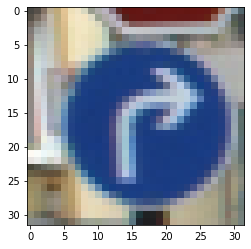

In [8]:
i = 21 #Random number
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'Speed limit (50km/h)'

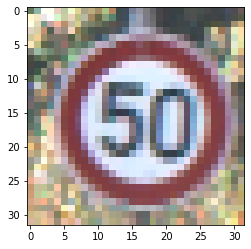

In [9]:
i = 34 
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'Speed limit (30km/h)'

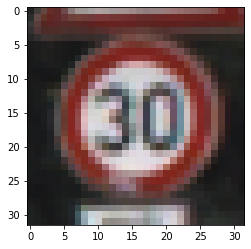

In [10]:
i = 91  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'Go straight or right'

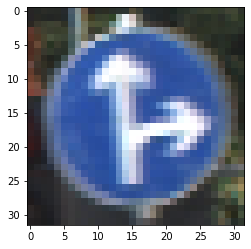

In [11]:
i = 130  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'General caution'

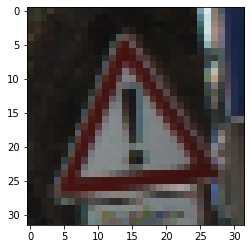

In [12]:
i = 136  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'No passing'

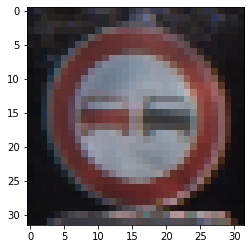

In [13]:
i = 165  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'No entry'

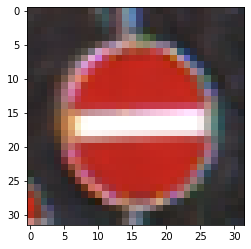

In [14]:
i = 154  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

'Traffic signals'

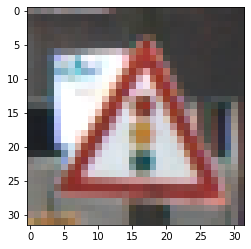

In [15]:
i = 172  
plt.imshow(X_test[i]) 
signs[ y_test[i]]

In [16]:
#This function plots a histogram of the input data.

def histogram_plot(dataset, label):

    hist, bins = np.histogram(dataset, bins=n_classes)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(label)
    plt.ylabel("Image count")
    plt.show()

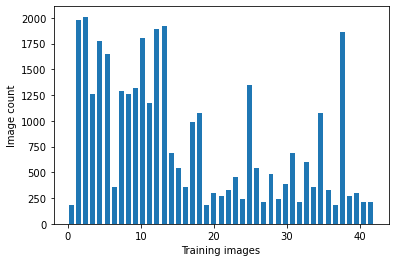

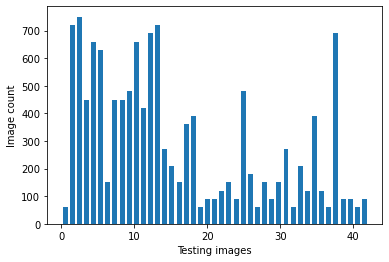

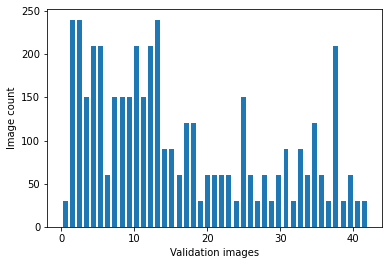

In [17]:
# Plotting histograms of the count of each sign
histogram_plot(y_train, "Training images")
histogram_plot(y_test, "Testing images")
histogram_plot(y_validation, "Validation images")

# STEP 3: DATA PREPROCESSING

# (i) Shuffling the data

- In general, we shuffle the training data to increase randomness and variety in training dataset, so that after training, the model is more stable. We don't want our model to learn any kind of specific order/pattern of images.

In [18]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# (ii) Grayscaling

- Converting the coloured images to grayscaled images. Here, the average pixel values of three channels (RGB) is taken and a single channel is created. The dimensions of image (i.e. 32 x 32) is kept same.

In [19]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

# (iii) Normalization

- Normalization of image pixel values is done. This process makes the computation faster and the neural network learns more efficiently.

In [20]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [21]:
X_train_gray.shape

(34799, 32, 32, 1)

Original Image


'Speed limit (50km/h)'

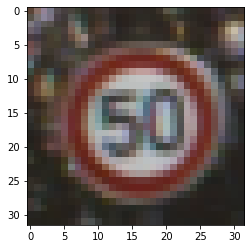

In [22]:
# Visualising an image before and after the data preprocessing

i = 45  #Random number
plt.imshow(X_train[i])
print('Original Image')
signs[ y_train[i]]

Grayscaled Normalized Image


'Speed limit (50km/h)'

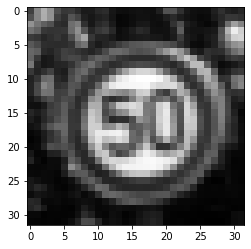

In [23]:
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
print('Grayscaled Normalized Image')
signs[ y_train[i]]

# STEP 4: MODEL TRAINING

The LeNet Architecture Model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Used a 5x5 Filter with output depth of 6
    - Stride is the amount by which the filter/kernel is shifted when the filter is passed over the image
    - Output = (Input-Filter+1)/Stride => (32-5+1)/1 = 28
    - Apply a RELU (Rectified Linear Unit) Activation function to the output
    - Max Pooling for input, Input = 28x28x6 and Output = 14x14x6


- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Used a 5x5 Filter with output depth of 16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 14-5+1/1 = 10
    - Apply a RELU Activation function to the output
    - Max Pooling with Input = 10x10x16 and Output = 5x5x16
    

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400
    

- STEP 4: FULLY CONNECTED LAYER 1
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output
    

- STEP 5: FULLY CONNECTED LAYER 2
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output
    

- STEP 6: FULLY CONNECTED LAYER 3
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43
    

In [24]:
# Importing the required Python libraries for building Convolutional Neural Network

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [25]:
image_shape = X_train_gray[i].shape

In [26]:
# Building the LeNet Architecture CNN model in a sequential manner/fashion.
cnn_model = Sequential()

# Convolution Layer 1
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))

# Pooling/Subsampling Layer 1
cnn_model.add(MaxPooling2D())

# Dropout(Regularization Technique)
cnn_model.add(Dropout(0.4))



# Convolution Layer 2
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Pooling/Subsampling Layer 2
cnn_model.add(MaxPooling2D())

# Dropout(Regularization Technique)
cnn_model.add(Dropout(0.4))



# Flattening the network
cnn_model.add(Flatten())

# Hidden Layer 1 (Fully connected layer)
cnn_model.add(Dense(units=120, activation='relu'))

# Hidden Layer 2 (Fully connected layer)
cnn_model.add(Dense(units=84, activation='relu'))

# Output Layer with 43 Classes
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [27]:
# Compiling the model and training the model

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [28]:
# Fitting the training dataset in the CNN model

history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

C:\Users\Admin\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 21s 611us/step - loss: 3.2294 - accuracy: 0.1609 - val_loss: 2.5959 - val_accuracy: 0.3390
Epoch 2/50
34799/34799 [==============================] - 19s 538us/step - loss: 1.9055 - accuracy: 0.4737 - val_loss: 1.3247 - val_accuracy: 0.6302
Epoch 3/50
34799/34799 [==============================] - 23s 652us/step - loss: 1.2544 - accuracy: 0.6341 - val_loss: 0.9978 - val_accuracy: 0.7107
Epoch 4/50
34799/34799 [==============================] - 22s 623us/step - loss: 1.0132 - accuracy: 0.6990 - val_loss: 0.7875 - val_accuracy: 0.7819
Epoch 5/50
34799/34799 [==============================] - 21s 612us/step - loss: 0.8734 - accuracy: 0.7416 - val_loss: 0.7000 - val_accuracy: 0.8104
Epoch 6/50
34799/34799 [==============================] - 20s 583us/step - loss: 0.7791 - accuracy: 0.7677 - val_loss: 0.6287 - val_accuracy: 0.8181
Epoch 7/50
34799/34799 [==============================] -

# STEP 5: MODEL EVALUATION

In [29]:
#Testing/Evaluating the Model with testing dataset which contains over 12000 images

score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy : {:.2f}'.format(score[1] * 100))

12630/12630 [==============================] - 3s 256us/step
Test Accuracy : 92.30


In [30]:
#Checking the keys in history
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

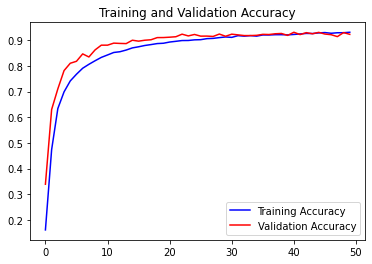

In [31]:
#Plotting Training and Validation Accuracy vs Epoch number

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

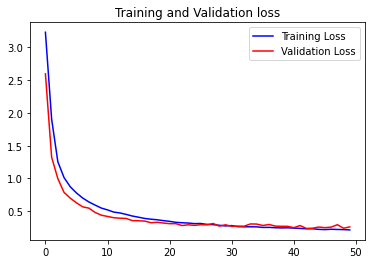

In [32]:
#Plotting Training and Validation Loss vs Epoch number

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [33]:
# Getting the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

# Actual classes of the test data
y_true_classes = y_test

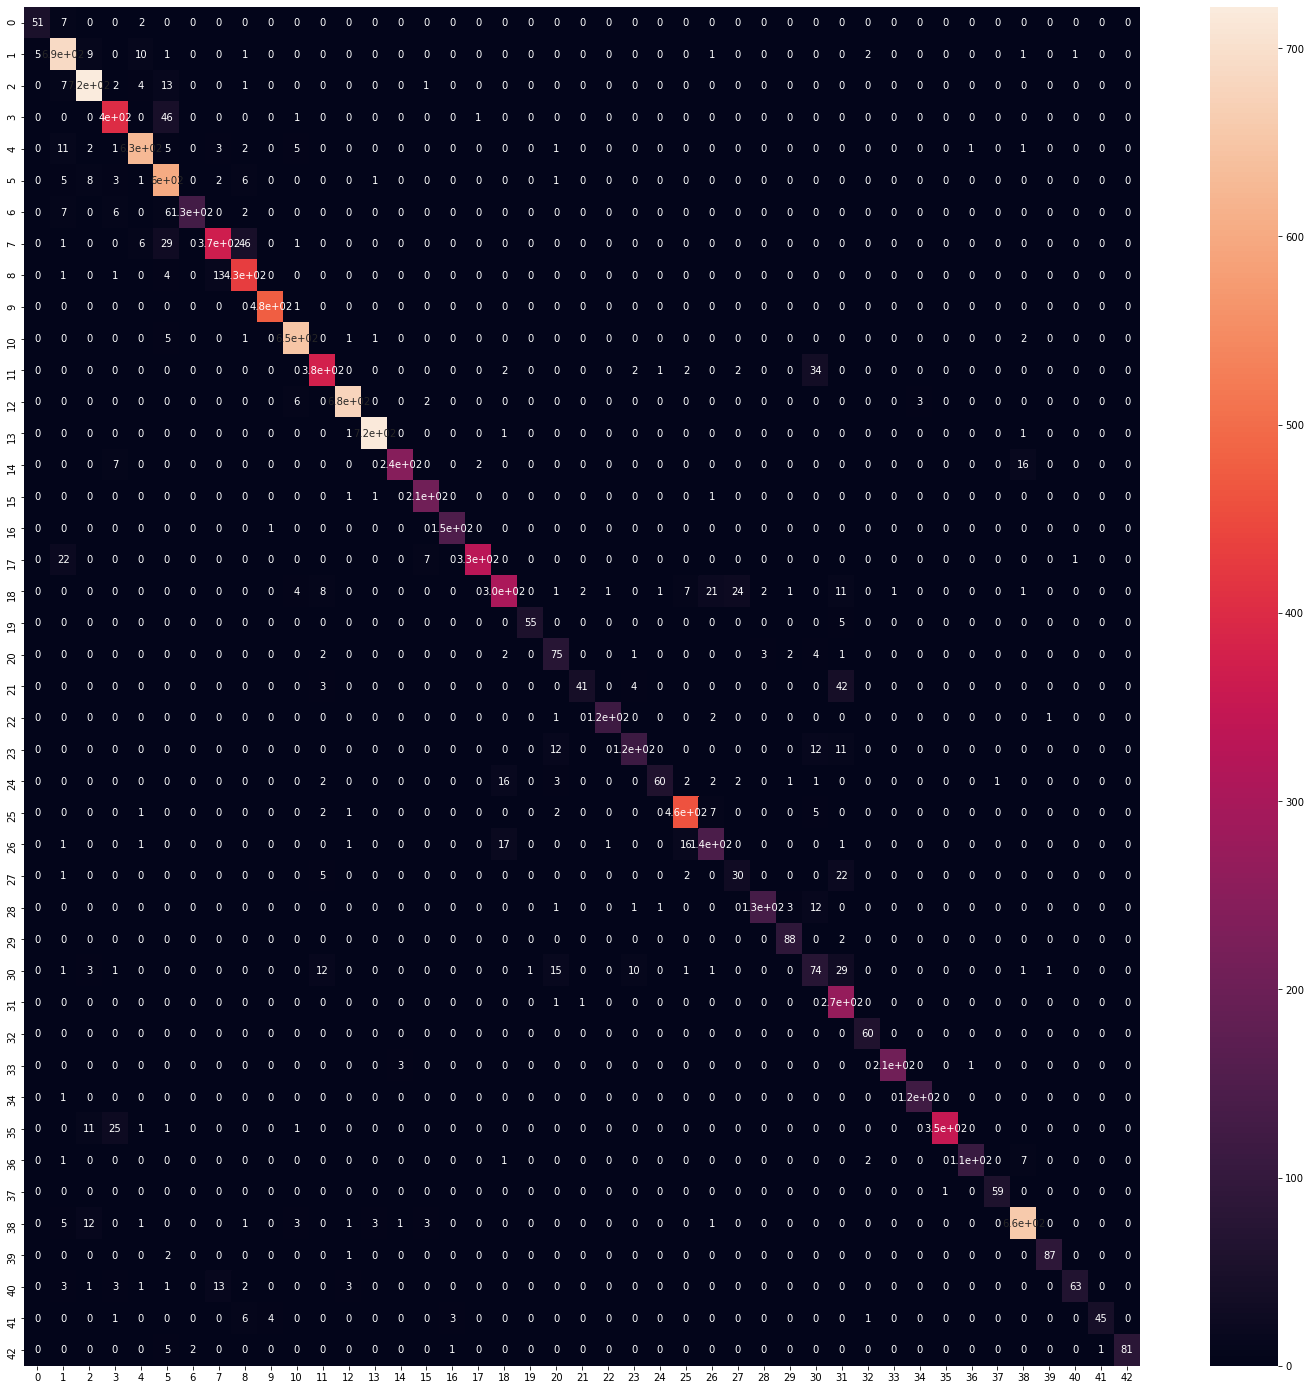

In [34]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_classes, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

Observation : 
We observe some clusters in the confusion matrix above. It turns out that the various speed limits are sometimes misclassified among themselves. Similarly, traffic signs with traingular shape are misclassified among themselves. We can further improve on the model using hierarchical CNNs to first identify broader groups (like speed signs) and then have CNNs to classify finer features (such as the actual speed limit).

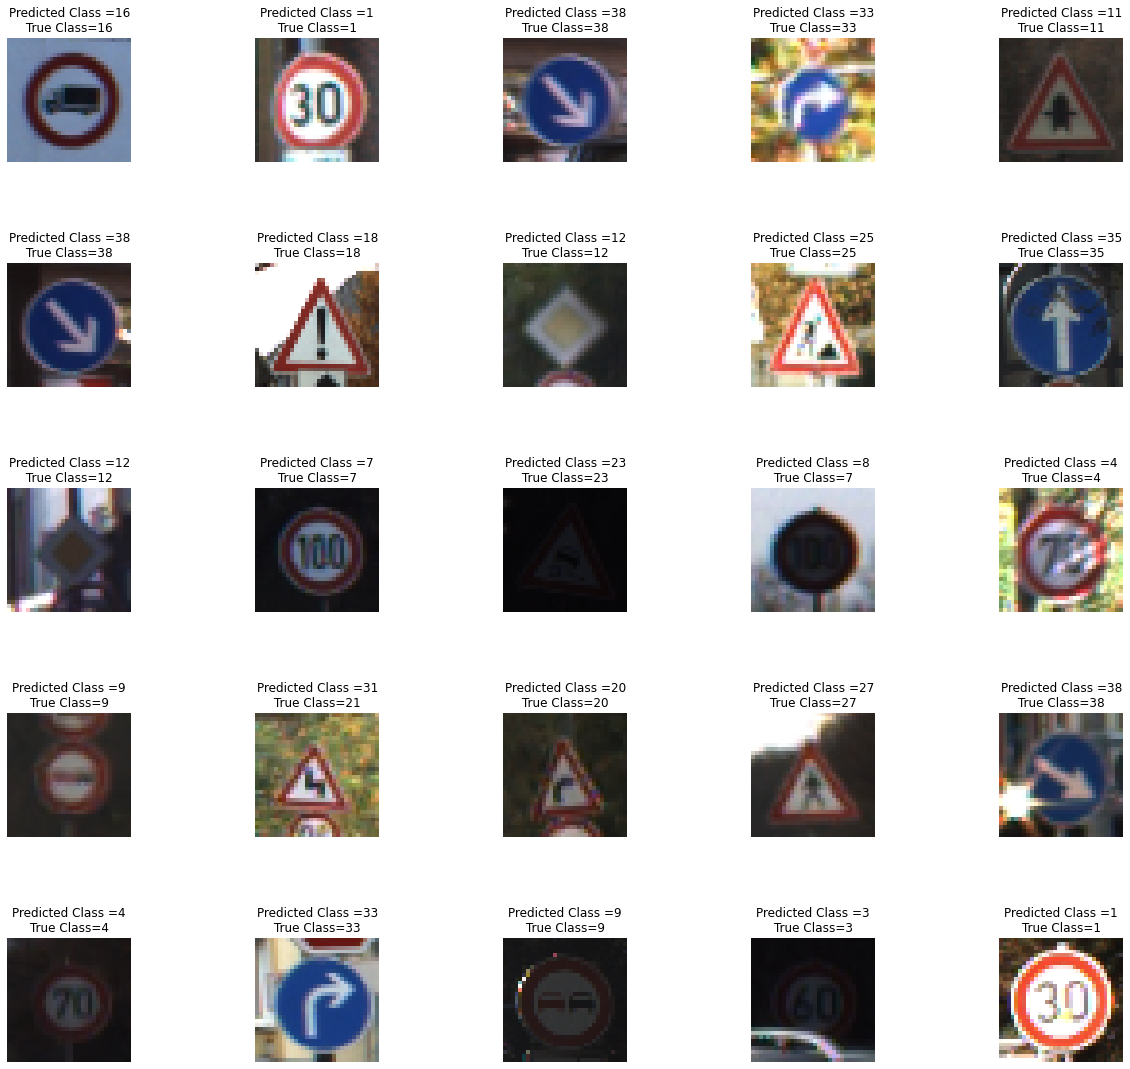

In [35]:
#Visualing the results of CNN model by comparing the Predicted class and Actual class of first 25 images from test dataset

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()  

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicted Class ={}\n True Class={} ".format(predicted_classes[i], y_true_classes[i] ))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)